In [68]:
from cftime import DatetimeNoLeap
from numpy import empty, repeat, stack
from numpy.ma import masked_greater
from os import chdir
from scipy.interpolate import griddata
from xarray import DataArray, open_dataset

In [69]:
dt = 2015, 1, 1, 0
data_time = DatetimeNoLeap(dt[0], dt[1], dt[2], dt[3])
file_time = str(data_time).replace(' ', '_')

In [70]:
chdir('/home/zhangc/scenariomip_cmip6/nc_data/')

In [71]:
nc_6hr = ['ta_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc']

In [72]:
nc_day = ['tos_Oday_CESM2_ssp245_r2i1p1f1_gn_20150102-20650101.nc',
          'siconc_SIday_CESM2_ssp245_r2i1p1f1_gn_20150102-20650101.nc']

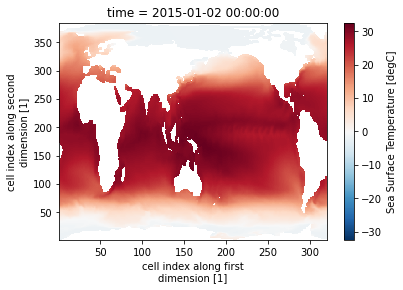

In [96]:
ds = open_dataset(nc_day[0])
da = ds.tos.isel(time=0)
#da = ds.siconc.isel(time=0)
da.plot()

In [98]:
x = da.lon.values.flatten()
y = da.lat.values.flatten()

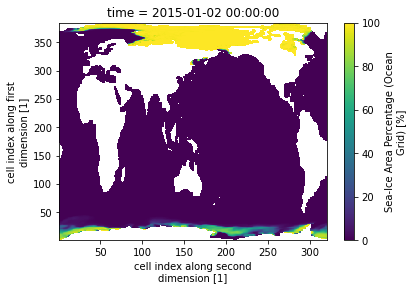

In [99]:
ds = open_dataset(nc_day[1])
da = ds.siconc.isel(time=0)
da.plot()

In [100]:
v = da.values.flatten()

In [101]:
xy = stack((x, y), axis=-1)

In [102]:
ds = open_dataset(nc_6hr[0])

In [103]:
lon1d = ds.lon.values
lat1d = ds.lat.values

In [104]:
lon2d = repeat(lon1d, len(lat1d)).reshape(len(lon1d), len(lat1d)).transpose()
lat2d = repeat(lat1d, len(lon1d)).reshape(len(lat1d), len(lon1d))

In [105]:
vi = griddata(xy, v, (lon2d, lat2d), method='linear')

In [106]:
da = DataArray(data=vi, coords=[lat1d, lon1d], dims=['lat', 'lon'])

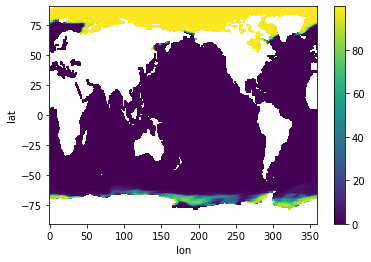

In [107]:
da.plot()